   ## <center> Capstone Project - The Battle of the Neighborhoods</center>
  <center> <span style="color:red"> Applied Data Science Capstone by IBM/Coursera</span></center>   

## Table of contents
***
<span> [A- Introduction: Business Problem](#introduction) </span>

<span>[B- Data](#data)</span>

<span>[C- Abidjan neighbrhoods](#abidjan)</span>

   + [Methodology](#methodology)
   + [Analysis](#analysis)
    
<span>[D- Dakar neighborhoods](#dakar)</span>

   + [Methodology](#methodology)
   + [Analysis](#analysis)
    
<span>[E- Comparing Abidjan and Dakar Neighborhoods](#comparison)</span>

   + [Methodology](#methodology)
   + [Analysis](#analysis)
    
<span>[F- Results and Discussion](#results)</span>

<span>[G- Conclusion](#conclusion)</span>

***

## <span style="color:darkblue"> A-  Introduction: Business Problem</span> 
Abidjan and Dakar are two major capitals in west Africa. In this project, we will endeavour to understand their respective neighborhood and see if there is any similarity to point out.

+ First we will focus on the neighborhoods in Abijan and analyse their characteristics
+ Second we will study the neighborhoods in Dakar.
+ And finally study the similarity between Abidjan and Dakar neighborhoods.

## <span style="color:darkblue"> B- Data</span>
<span>To be able to perform the analysis mentioned above, we will need</span>
 
 - Neighborhoods data of Dakar and Abidjan (names)
 - And their location data such as latitude and longitude. 
 
<span> With these inputs,  we will use Forsquare api to get information on the venues of the different neighborhoods.
Cluster the categories of the venues per neighborhood to see how similar/dissimilar they are.</span> 

**Now let's start the work by importing the required librairies**

In [1]:
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle requests
import requests 
import json 

# JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#k-means model for clustering stage
from sklearn.cluster import KMeans

##  <span style="color:darkblue"> C- Abidjan  neighborhoods</span>

### Methodology
Abidjan is the capital city of Ivory Cost in west Africa.
It was difficult to find a complete strcutured data on its neighborhoods location data at one place. So we fetched on the web, the information per neighborhood and initiated a csv file.
From the csv, we load the neighborhoods and their geo data (latitude, longitude) and then analyse their venues categories and cross checked our results with the remark made in the table below(from https://abidjanais.mondoblog.org/abidjan/) .

Neighborhood        | Nicknames       | Description
:------------------- |:-----------------:|:---------------------
**Abobo**           | The war         | Has a population renowned for its violence.
                    |                 |
**Adjamé**          | Watch out for thieves!|It is the disctrict with the largest number of retail space, hence the highest attendance rate of the Abidjan population. That makes Adjamé a town with a large number of pickpockets 
                    |                 |
**Atécoubé**        | The lost district of Abidjan   | It is located between Adjamé and Yopougon, making it difficult to be situated for the layman.
                    |                 |
**Cocody**          | The bourgeoisie | The name Cocody bring to mind riches
                    |
**Koumassi**        | Zone of turbulence. Everyone to your canoes!|The neighborhood becomes pathless at the slightest rain                                                                          because it is flooded.And a fight between kids can lead to a                                            general neighborhood clash. Everyone is, for some reason, always on the alert. 
                    |                 |
**Marcory**         | Europe bis      | It is the district with the largest number of Europeans.Marcory is also the town that contains a large number of chic bars and nightclubs
  |                 |
**Plateau**         | Let's talk business  |It is the district of business. You will therefore find the headquarters of most of  the major financial institutions, bookstores, shopping malls and luxury hotels. 
                    |                 | 
**Port-Bouet**      |Akwaba           | For all those who have already come to Abidjan by plane, this is the first town you have                                                           visited.
                    |                 |        
**Treichville**     |True modernism   | The neighborhood of Abidjan where the streets and avenues have names.
                    |                 |
**Yopougon**        |Joy              |This is the town where there are maquis at every hundred paces; without exagerating. And beer is flowing in this town 7 days a week 
                                           

***
<p>  <center> Table :  Abidjan neighborhoods overview</center></p> 

***


The cvs file wich contains abidjan neighborhoods(total of thirteen) is Loaded. IC stands for Ivory Cost.

In [2]:
ab = pd.read_csv('abidjan_dataSet.csv')
ab.head(15)

,Neighborhood,Latitude,Longitude
0,Abobo (IC),5.432887,-4.038892
1,Adjame (IC),5.365073,-4.023572
2,Yopougon (IC),5.324281,-4.089586
3,Le Plateau (IC),5.323212,-4.023689
4,Attecoube (IC),5.336200,-4.041400
5,Cocody (IC),5.350000,-3.983300
6,Koumassi (IC),5.303000,-3.941900
7,Marcory (IC),5.302700,-3.982700
8,Port-Bouet (IC),5.277300,-3.885900
9,Treichville (IC),5.293600,-4.008300


#### Foursquare
We use Foursquare API to get venues data (names,categories) for the different neighborhoods.

In [3]:
#the credential to connect to Foursquare API
CLIENT_ID = 'xxxxxxxxx' 
CLIENT_SECRET = 'fhfhfhfhfh' 
VERSION = 'jfkfkf' 
LIMIT = 100

**The function** _getNearbyVenues()_  defined below is to get the venues within a radius of 1500 m for the neighborhoohs.

In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
                
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        try:
            results = requests.get(url).json()["response"]['groups'][0]['items']
        except:
            print('Aeiii An exception over her!!')
            
        # return relevant information for each nearby venue
        venues_list.append([(
             name, 
             lat, 
             lng, 
             v['venue']['name'], 
             v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category']
    
    return(nearby_venues)

Call to _getNearbyVenues_ function with the parameter from the dataframe **ab** (the data loaded from the csv file)

In [5]:
ab_venues=getNearbyVenues(names=ab['Neighborhood'],
                                   latitudes=ab['Latitude'],
                                   longitudes=ab['Longitude'],
                                  radius=1500)

Here is the result dataframe _ab_venues_

In [6]:
print("The total venues returned by foursquare is :{} ".format(ab_venues.shape[0]))
ab_venues.head()

The total venues returned by foursquare is :86 


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category
0,Abobo (IC),5.432887,-4.038892,Glacier NUMBER ONE,Gastropub
1,Adjame (IC),5.365073,-4.023572,Black Market,Flea Market
2,Adjame (IC),5.365073,-4.023572,Nouvelle Gare,Bus Station
3,Adjame (IC),5.365073,-4.023572,Deport de Boisson,Brewery
4,Adjame (IC),5.365073,-4.023572,Gare SBTA,Train Station


### Analysis
Let's group the venues per Neighborhood

In [53]:

#print('\nThere are {} uniques categories.'.format(len(ab_venues['Venue Category'].unique())))

count_venues= ab_venues[['Neighborhood','Venue','Venue Category']].groupby('Neighborhood').count()
count_venues.reset_index()
count_venues.head(20)

,Venue,Venue Category
Neighborhood,,
Abobo (IC),1,1
Adjame (IC),7,7
Attecoube (IC),3,3
Bingerville (IC),1,1
Cocody (IC),8,8
Koumassi (IC),6,6
Le Plateau (IC),15,15
Marcory (IC),28,28
Treichville (IC),8,8


We can see here that Foursquare returned only 10 neighborhoods venues (over 13 initialy)

+ **_Marcory_ and _Plateau_** have the highest number of venues declared => probably the most prominante neighborhoods.
+ **_Cocody_,_Yopougan_,_Treichville_, _Koumassi_ and _Adjame_**  are second in line in term of number of venues.
+ **_Abobo_** (renowned for its violence)  and **_Bingerville_** have the less number of venues. Which can denote that they are less infrastructure built there.

### Preparing the data for clustering
Let's cluster the neighborhoods and see how similar they are based this time on their venue categories. To do so, we create a dummy dataset with venues categories.

In [145]:
# dummy values
ab_dummy = pd.get_dummies(ab_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
ab_dummy['Neighborhood'] = ab_venues['Neighborhood'] 

# move neighborhood column as the first column
fixed_columns = [ab_dummy.columns[-1]] + list(ab_dummy.columns[:-1])
ab_dummy= ab_dummy[fixed_columns]

#ab_dummy.tail(13)

>We groupe the categories values by neighborhood and calculate their means

In [146]:
ab_grouped = ab_dummy.groupby('Neighborhood').mean().reset_index()
ab_grouped.tail(13)

,Neighborhood,African Restaurant,Art Gallery,BBQ Joint,Bakery,Bar,Basketball Stadium,Beer Bar,Bistro,Boutique,Bowling Alley,Brewery,Bus Station,Cafeteria,Café,Camera Store,Comedy Club,Convenience Store,Cupcake Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Flea Market,Food Court,French Restaurant,Furniture / Home Store,Gastropub,Grocery Store,Halal Restaurant,Harbor / Marina,Hotel,Ice Cream Shop,Italian Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Nightclub,Park,Pharmacy,Pier,Pizza Place,Playground,Restaurant,Sandwich Place,Shopping Mall,Soccer Field,Sporting Goods Shop,Supermarket,Train Station
0,Abobo (IC),0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Adjame (IC),0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.142857,0.142857,0.000000,0.000000,0.142857,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.142857,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
2,Attecoube (IC),0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bingerville (IC),0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Cocody (IC),0.125,0.000000,0.125,0.125000,0.000000,0.000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000
5,Koumassi (IC),0.000,0.000000,0.000,0.166667,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.166667,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.166667,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Le Plateau (IC),0.000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.0,0.066667,0.000000,0.00,0.400000,0.000000,0.066667,0.000000,0.000,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.066667,0.000000,0.000000,0.000000
7,Marcory (IC),0.000,0.035714,0.000,0.000000,0.000000,0.000,0.000000,0.035714,0.000,0.035714,0.035714,0.000000,0.035714,0.071429,0.000000,0.000,0.000000,0.000000,0.035714,0.035714,0.000000,0.035714,0.035714,0.000000,0.035714,0.000000,0.035714,0.0,0.000000,0.035714,0.0

In [51]:
#ab_grouped.groupby('African Restaurant')['African Restaurant'].transform('size')


> Let's get the top venues per neighborhood by calling the function _sorted_neigh_venues1_ which does mainly the following:
>+ Select the top venue categories
>+ Return a new sorted dataframe with the top venues. 
>+ Named the new data frame columns after this manner : 1st column ,2nd column, 3rd column and so fourth  

In [147]:
def sorted_neigh_venues1(df_grouped):
    topY_venues = 5
    indicators = ['st', 'nd', 'rd']
    vect = [0 for i in range(5)]
        
    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(topY_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neigh_venues_sorted = pd.DataFrame(columns=columns)
    neigh_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

    
    for ind in np.arange(df_grouped.shape[0]):
            row_categories = df_grouped.iloc[ind, :].iloc[1:]
            row_categories_sorted = row_categories.sort_values(ascending=False)
            row_final=row_categories_sorted.index.values[0:topY_venues] #row_categories_sorted.index[0:topY_venues]
            #print("type:{}{}".format(ind, row_final))
            i=0
            for f in row_final:
                val=row_categories_sorted.get(key=f)
                if (val==0) :
                    i=i+1
                    pass
                else:
                    vect[i]=val
                    i=i+1
            
            neigh_venues_sorted.iloc[ind, 1:6] = vect
    
    return neigh_venues_sorted

The function _sorted_neigh_venues2_ is slightly different from the above in the fact that at the places of the means values, it displays their category names.

In [148]:
def sorted_neigh_venues2(df_grouped):
    topX_venues = 5
    indicators = ['st', 'nd', 'rd']

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(topX_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neigh_venues_sorted = pd.DataFrame(columns=columns)
    neigh_venues_sorted['Neighborhood'] = df_grouped['Neighborhood']

    for ind in np.arange(df_grouped.shape[0]):
        row_categories = df_grouped.iloc[ind, :].iloc[1:]
        row_categories_sorted = row_categories.sort_values(ascending=False)
        neigh_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:topX_venues]
      
    
    return neigh_venues_sorted

> Calling the functions **_sorted_neigh_venues1_** and **__sorted_neigh_venues2_** on abidjan data(the _grouped_ categories by neighborhoods) 

In [149]:
abidjan=sorted_neigh_venues1(ab_grouped)
abidjan.head(13) #all the neighborhoods

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abobo (IC),1,0,0,0,0
1,Adjame (IC),0.285714,0.142857,0.142857,0.142857,0.142857
2,Attecoube (IC),0.666667,0.333333,0.142857,0.142857,0.142857
3,Bingerville (IC),1,0.333333,0.142857,0.142857,0.142857
4,Cocody (IC),0.125,0.125,0.125,0.125,0.125
5,Koumassi (IC),0.166667,0.166667,0.166667,0.166667,0.166667
6,Le Plateau (IC),0.4,0.0666667,0.0666667,0.0666667,0.0666667
7,Marcory (IC),0.107143,0.0714286,0.0714286,0.0357143,0.0357143
8,Treichville (IC),0.25,0.125,0.125,0.125,0.125
9,Yopougon (IC),0.333333,0.111111,0.111111,0.111111,0.111111


In [150]:
abidjan=sorted_neigh_venues2(ab_grouped)
abidjan.head(13) #all the neighborhoods

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abobo (IC),Gastropub,Train Station,Cafeteria,Electronics Store,Diner
1,Adjame (IC),Fast Food Restaurant,Train Station,Brewery,Camera Store,Bus Station
2,Attecoube (IC),Pier,Department Store,Train Station,Bus Station,Electronics Store
3,Bingerville (IC),Restaurant,Train Station,Bus Station,Electronics Store,Diner
4,Cocody (IC),African Restaurant,Fast Food Restaurant,BBQ Joint,Bakery,Diner
5,Koumassi (IC),Diner,Bakery,Cupcake Shop,Convenience Store,Hotel
6,Le Plateau (IC),Hotel,French Restaurant,Grocery Store,Nightclub,Park
7,Marcory (IC),Shopping Mall,Café,Nightclub,Food Court,Ice Cream Shop
8,Treichville (IC),Harbor / Marina,African Restaurant,Basketball Stadium,Comedy Club,Mobile Phone Shop
9,Yopougon (IC),Bar,Electronics Store,Restaurant,Playground,Beer Bar


Crossing the two displayed dataframes.The first venues are relevant in the neighborhood. We can therefore tag the neigborhoods as follow. 

Neighborhoods    |characteristics       |Description
:----------------|:--------------------:|:-------------------
Abobo |Gastropub|Gastropub
Adjame|Very busy place| Fast Food Restaurant, and Bus Stations
Attecoube|Pier|Pier
Bingerville |Restauration|Restauration
Cocody|Modern place with restaurant and boutiques|-No enough distinctive character. but incolporate rich neighborhood 
Koumassi|Restauration as well is dominant activity|-No enough distinctive character --
Le Plateau|Business area|Hotel
Marcory|Foreigner life style|Shopping Mall ,Nightclub  
Treichville|Habor and electronics shops|Harbor / Marina  
Yopougon|bars|bars

***
<center>Table 1: Abidjan neighborhoods distinctive characters</center>


> Now let see how similar these neighborhoods are by using KMEAN model to cluster them into 7 clusters.

In [151]:
# set number of clusters
kclusters = 7

#drop Neighborhood column
ab_grouped_cluster = ab_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ab_grouped_cluster)

# cluster labels generated for each row in the dataframe
kmeans.labels_[0:13] 

array([1, 6, 3, 2, 0, 5, 5, 0, 0, 4])

In [152]:
# insert cluster labels into the sorted (abidjan) dataframe 
abidjan.insert(0, 'Cluster Labels', kmeans.labels_)
abidjan.head(13)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Abobo (IC),Gastropub,Train Station,Cafeteria,Electronics Store,Diner
1,6,Adjame (IC),Fast Food Restaurant,Train Station,Brewery,Camera Store,Bus Station
2,3,Attecoube (IC),Pier,Department Store,Train Station,Bus Station,Electronics Store
3,2,Bingerville (IC),Restaurant,Train Station,Bus Station,Electronics Store,Diner
4,0,Cocody (IC),African Restaurant,Fast Food Restaurant,BBQ Joint,Bakery,Diner
5,5,Koumassi (IC),Diner,Bakery,Cupcake Shop,Convenience Store,Hotel
6,5,Le Plateau (IC),Hotel,French Restaurant,Grocery Store,Nightclub,Park
7,0,Marcory (IC),Shopping Mall,Café,Nightclub,Food Court,Ice Cream Shop
8,0,Treichville (IC),Harbor / Marina,African Restaurant,Basketball Stadium,Comedy Club,Mobile Phone Shop
9,4,Yopougon (IC),Bar,Electronics Store,Restaurant,Playground,Beer Bar



Neighborhood  | Cluster Label|Description
:-------------|:------------:|:---------------:
Abobo|2| Gastropub
Adjame|6|Popular and busy district
Attecoube|3|Pier
Bingerville|0|Restauration
Cocody, Koumassi|1|supermakes and bakery?
Le Plateau, Marcory, Treichville|5|Business, shoping and entertaiment
Yopougon|4|Bar

<span></span>

<center>Table 2: Abidjan neighborhoods by cluster</center>

***
+ **_Abobo_** and **_Bingerville_** could go together in the same cluster
+ **_Yopougon_** is on its own with Bars and restaurants. 
+ **_Koumassi_** and **_Cocody_** being in the same cluster confirms the remark we reported in : "Table 1: Abidjan neighborhoods distinctive characters".For there we noticed that both neighborhoods did not have a dominant characteristics.

## <span style="color:darkblue">D- Dakar neighborhoods</span>

Regarding Dakar , we followed the same procedure as with Abidjan.
+ Prepare the data
+ Load the geographicalcordinates of the neighborhoods in a dataframe
+ Analyse similarities between neighborhoods with the venues provided by Foursquare


Load dakar cvs file with  all its neighborhoods (18 in total). SN stands for Senegal.

In [16]:
dk = pd.read_csv('dakar_dataSet.csv',encoding='latin1') 
dk.head()

,Borough,Neighborhood,Latitude,Longitude
0,Almadies,Mermoz Sacre Cur (SN),14.703417,-17.474614
1,Almadies,Ngor (SN),14.744162,-17.512056
2,Almadies,Ouakam (SN),14.723712,-17.494233
3,Almadies,Yoff (SN),14.747126,-17.490256
4,Dakar Plateau,Dakar Plateau (SN),14.671830,-17.418832


>We use Foursquare api  in _getNearbyVenues_ function  to get venues data (names,categories) for the different neighborhoods.
>_getNearbyVenues_ was defined earlier

In [17]:
dk_venues = getNearbyVenues(names=dk['Neighborhood'],
                                   latitudes=dk['Latitude'],
                                   longitudes=dk['Longitude'],
                                   radius=1500)

### Analysis
Let's group the venues per Neighborhood

In [59]:
dk_venues[['Neighborhood','Venue','Venue Category']].groupby('Neighborhood').count()


,Venue,Venue Category
Neighborhood,,
Camberene (SN),3,3
Dakar Plateau (SN),21,21
Dieuppeul Derkle (SN),5,5
Fann Point E Amitie (SN),11,11
Goree (SN),4,4
Grand Dakar (SN),7,7
Grand Yoff (SN),8,8
Gueule Tapee Fass Colobane (SN),10,10
HLM (SN),4,4


In term of number of venues per neighborhoos, we can have the following structure:

1. First : _Ngor_, _Mermoz Sacre Coeur_, _Dakar Plateau_  have the highest number of venues
2. Second : _Sicap Liberte_, _Fann Point E Amitie_, _Yoff_
3. Third: _Gueule Tapee Fass Colobane_, _Hann Bel Air_, _Medina_ ,_Ouakam_, _Grand Dakar_, _Grand Yoff_, _Les Parcelles Assainies_
4. Fourth: _Dieuppeul Derkle_, _Goree_, _HLM_, _Patte d Oie_,_Camberene_


> Based this time on the venues categories , let's cluster the neighborhoods and see how similar they are. 

First we create a dummy dataset with venues categories.

In [19]:
# dummy
dk_dummy = pd.get_dummies(dk_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dk_dummy['Neighborhood'] = dk_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dk_dummy.columns[-1]] + list(dk_dummy.columns[:-1])
dk_dummy = dk_dummy[fixed_columns]

We group the categories values by neighborhood and calculate their means

In [20]:
dk_grouped = dk_dummy.groupby('Neighborhood').mean().reset_index()
dk_grouped.head()

,Neighborhood,Accessories Store,African Restaurant,Airport,Airport Lounge,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Bathing Area,Beach,Beach Bar,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Buffet,Business Service,Café,Casino,Chinese Restaurant,Coffee Shop,Convenience Store,Creperie,Diner,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Food & Drink Shop,Fountain,French Restaurant,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Golf Course,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,History Museum,Hostel,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Italian Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Lighthouse,Lounge,Market,Mobile Phone Shop,Movie Theater,Optical Shop,Park,Pastry Shop,Pharmacy,Pier,Pizza Place,Playground,Plaza,Pool,Resort,Restaurant,Scenic Lookout,Seafood Restaurant,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Sports Club,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Turkish Restaurant,Zoo
0,Camberene (SN),0.333333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.333333,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,Dakar Plateau (SN),0.000000,0.047619,0.0,0.0,0.047619,0.0,0.0,0.00,0.0,0.000000,0.047619,0.047619,0.000000,0.0,0.0,0.047619,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.047619,0.047619,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.047619,0.095238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.142857,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.095238,0.0,0.00,0.0,0.095238,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,Dieuppeul Derkle (SN),0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.2,0.0,0.6,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,Fann Point E Amitie (SN),0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.090909,0.000000,0.000000,0.090909,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181818,0.0,0.090909,0.000000,0.0,0.00,0.0,0.000000,0.090909,0.0,0.0,0.090909,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0
4,Goree (SN),0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.25,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


Then call the function _sorted_neigh_venues1_ to sort dk_grouped data and save the result in a new dataframe.

In [61]:
dakar=sorted_neigh_venues1(dk_grouped)
dakar.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Camberene (SN),0.333333,0.333333,0.333333,0,0
1,Dakar Plateau (SN),0.142857,0.0952381,0.0952381,0.0952381,0.047619
2,Dieuppeul Derkle (SN),0.6,0.2,0.2,0.0952381,0.047619
3,Fann Point E Amitie (SN),0.181818,0.0909091,0.0909091,0.0909091,0.0909091
4,Goree (SN),0.25,0.25,0.25,0.25,0.0909091
5,Grand Dakar (SN),0.142857,0.142857,0.142857,0.142857,0.142857
6,Grand Yoff (SN),0.25,0.25,0.125,0.125,0.125
7,Gueule Tapee Fass Colobane (SN),0.2,0.2,0.1,0.1,0.1
8,HLM (SN),0.25,0.25,0.25,0.25,0.1
9,Hann Bel Air (SN),0.25,0.25,0.25,0.25,0.1


The call to function _sorted_neigh_venues2_ gives us the following

In [62]:
dakar=sorted_neigh_venues2(dk_grouped)
dakar.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Camberene (SN),Accessories Store,Business Service,Bakery,Brazilian Restaurant,Buffet
1,Dakar Plateau (SN),Hotel,French Restaurant,Pool,Seafood Restaurant,Lounge
2,Dieuppeul Derkle (SN),Fast Food Restaurant,Electronics Store,Health & Beauty Service,Diner,Buffet
3,Fann Point E Amitie (SN),Pizza Place,Asian Restaurant,Bakery,French Restaurant,Steakhouse
4,Goree (SN),Boat or Ferry,History Museum,Art Museum,Restaurant,Zoo
5,Grand Dakar (SN),Asian Restaurant,French Restaurant,Steakhouse,Soccer Stadium,Plaza
6,Grand Yoff (SN),Supermarket,Fast Food Restaurant,Business Service,Soccer Stadium,Bakery
7,Gueule Tapee Fass Colobane (SN),Restaurant,Hotel,Breakfast Spot,French Restaurant,Sports Club
8,HLM (SN),Zoo,Farmers Market,Restaurant,Ice Cream Shop,Convenience Store
9,Hann Bel Air (SN),Furniture / Home Store,Health & Beauty Service,Sporting Goods Shop,Diner,Creperie



Neighborhood  | Character|Description
:-------------|:------------|:---------------
Camberene| Bakery,Business Service|Accessories Store,Business Service	Bakery
Dakar Plateau|Hotel|Hotel,Pool,Seafood Restaurant
Dieuppeul Derkle|Fast Food Restaurant,Electronics Store,Health & Beauty Service|
Fann Point E Amitie|Pizza Place|Foreigners Restauration
Goree|Boat or Ferry,History Museum,Art Museum|Historical site?
Grand Dakar|-|Asian Restaurant,French Restaurant,Steakhouse	Soccer Stadium
Grand Yoff|Supermarket,Fast Food Restaurant|
Gueule Tapee Fass Colobane|Restaurant,Hotel|
HLM|Zoo,Farmers Market|
Hann Bel Air|Furniture / Home Store,	Health & Beauty Service,	Sporting Goods Shop|
Les Parcelles Assainies|-|-
Medina|Shopping Mall| 
Mermoz Sacre Coeur|Pizza Place|
Ngor|Hotel|
Ouakam|Beach|
Patte d Oie|Supermarket	|
Sicap Liberte|Ice Cream Shop,Supermarket|
Yoff|Hotel,Airport Lounge|


<span></span>

<center>Table 2: Dakar neighborhoods clusters</center>

***

In other to see how similar these neighborhoods are ,we use KMEAN model to cluster dk_grouped data into 7 clusters.

In [153]:
# set number of clusters
kclusters = 7

dk_grouped_clustering = dk_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dk_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([6, 0, 2, 0, 1, 0, 5, 0, 3, 4, 5, 0, 0, 0, 0, 5, 5, 0])

In [154]:
# insert clustering labels
dakar.insert(0, 'Cluster Labels', kmeans.labels_)
dakar.head(20)

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,6,Camberene (SN),Accessories Store,Business Service,Bakery,Brazilian Restaurant,Buffet
1,0,Dakar Plateau (SN),Hotel,French Restaurant,Pool,Seafood Restaurant,Lounge
2,2,Dieuppeul Derkle (SN),Fast Food Restaurant,Electronics Store,Health & Beauty Service,Diner,Buffet
3,0,Fann Point E Amitie (SN),Pizza Place,Asian Restaurant,Bakery,French Restaurant,Steakhouse
4,1,Goree (SN),Boat or Ferry,History Museum,Art Museum,Restaurant,Zoo
5,0,Grand Dakar (SN),Asian Restaurant,French Restaurant,Steakhouse,Soccer Stadium,Plaza
6,5,Grand Yoff (SN),Supermarket,Fast Food Restaurant,Business Service,Soccer Stadium,Bakery
7,0,Gueule Tapee Fass Colobane (SN),Restaurant,Hotel,Breakfast Spot,French Restaurant,Sports Club
8,3,HLM (SN),Zoo,Farmers Market,Restaurant,Ice Cream Shop,Convenience Store
9,4,Hann Bel Air (SN),Furniture / Home Store,Health & Beauty Service,Sporting Goods Shop,Diner,Creperie



Neighborhood| Cluster Label|Description
:-----------|:------------:|:-------------------:
Camberene|3|Accessories Store, Business Service, Bakery
Dakar Plateau,Gueule Tapee Fass Colobane,Hann Bel Air,Medina,Ngor,Yoff|1|Hotel,Restaurant,Furniture / Home Store,HShopping Mall
Dieuppeul Derkle|6|Fast Food Restaurant,Electronics Store,Health & Beauty Service
Fann Point E Amitie,Grand Dakar,Grand Yoff,Les Parcelles Assainies,Mermoz Sacre Coeur,Ouakam,Sicap Liberte|0|Pizza Place,Supermarket,Fast Food Restaurant,	Beach,Ice Cream Shop
Goree|4|Boat or Ferry,History Museum,Art Museum
HLM|5|	Zoo,Farmers Market 
Patte d Oie|2| Supermarket

<span></span>

<center>Table 3: Dakar neighborhoods clusters</center>

***

## <span style="color:darkblue">E- Comparing Abidjan and Dakar Neighborhoods</span>

> We merge here abidjan and dakar data into one dataset called : _cities_neigh_

In [112]:
cities_neigh=ab_grouped.append(dk_grouped,ignore_index=True)
cities_neigh.iloc[8:15,:]

,Neighborhood,African Restaurant,Art Gallery,BBQ Joint,Bakery,Bar,Basketball Stadium,Beer Bar,Bistro,Boutique,Bowling Alley,Brewery,Bus Station,Cafeteria,Café,Camera Store,Comedy Club,Convenience Store,Cupcake Shop,Department Store,Dessert Shop,Diner,Electronics Store,Fast Food Restaurant,Flea Market,Food Court,French Restaurant,Furniture / Home Store,Gastropub,Grocery Store,Halal Restaurant,Harbor / Marina,Hotel,Ice Cream Shop,Italian Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Movie Theater,Nightclub,Park,Pharmacy,Pier,Pizza Place,Playground,Restaurant,Sandwich Place,Shopping Mall,Soccer Field,Sporting Goods Shop,Supermarket,Train Station,Accessories Store,Airport,Airport Lounge,American Restaurant,Arcade,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bathing Area,Beach,Beach Bar,Boarding House,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Buffet,Business Service,Casino,Chinese Restaurant,Coffee Shop,Creperie,Farmers Market,Food & Drink Shop,Fountain,Fruit & Vegetable Store,Golf Course,Gym,Gym / Fitness Center,Health & Beauty Service,History Museum,Hostel,Hotel Bar,Hotel Pool,Juice Bar,Kebab Restaurant,Kids Store,Lighthouse,Lounge,Market,Optical Shop,Pastry Shop,Plaza,Pool,Resort,Scenic Lookout,Seafood Restaurant,Snack Place,Soccer Stadium,Spa,Sports Club,Steakhouse,Surf Spot,Sushi Restaurant,Turkish Restaurant,Zoo
8,Treichville (IC),0.125000,0.0,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.125000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.25,0.000000,0.0,0.000000,0.0,0.125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.125000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Yopougon (IC),0.000000,0.0,0.000000,0.000000,0.333333,0.000,0.111111,0.111111,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.111111,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.111111,0.0,0.000000,0.111111,0.111111,0.0,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Camberene (SN),0.000000,0.0,0.000000,0.333333,0.000000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,NaN,0.000000,0.0,0.0,NaN,NaN,0.00,0.000000,0.0,0.000000,NaN,0.000,0.0,NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.0,0.0,0.0,NaN,0.333333,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.333333,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
11,Dakar Plateau (SN),0.047619,0.0,0.047619,0.000000,0.000000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.047619,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.000000,0.0,0.000000,NaN,0.095238,0.0,0.0,NaN,NaN,0.00,0.142857,0.0,0.047619,NaN,0.000,0.0,NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.0,0.0,0.0,NaN,0.000000,0.0,0.0,0.047619,0.0,0.00,0.0,0.000000,0.047619,0.0,0.047619,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.000000,0.047619,0.0,0.000000,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.000000,0.095238,0.0,0.0,0.095238,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
12,Dieuppeul Derkle (SN),0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.200000,0.6,0.000000,NaN,0.000000,0.0,0.0,NaN,NaN,0.00,0.000000,0.0,0.000000,NaN,0.000,0.0,NaN,0.0,0.000000,0.0,0.000000,0.000000,0.000000,NaN,0.000000,0.0,0.0,0.0,NaN,0.000000,0.0,0

> We then clean the _cities_neigh_ to keep only categories that  are common to both cities and store it in a new dataframe (_short_cat_data_).

In [113]:
#keep only the common venue categories
ab_categories= ab_venues['Venue Category'].unique()
dk_categories= dk_venues['Venue Category'].unique()
same_categories=[]

for cat in ab_categories :
    if cat in dk_categories :
        same_categories.append(cat)

same_categories.append('Neighborhood')
short_cat_data=cities_neigh[same_categories]
                      
short_cat_data.head()

,Gastropub,Flea Market,Fast Food Restaurant,Bar,Electronics Store,Pharmacy,Restaurant,Playground,Café,Hotel,Soccer Field,Park,Italian Restaurant,French Restaurant,Shopping Mall,Pier,Bakery,Boutique,BBQ Joint,African Restaurant,Diner,Supermarket,Convenience Store,Ice Cream Shop,Furniture / Home Store,Pizza Place,Bowling Alley,Sporting Goods Shop,Movie Theater,Art Gallery,Harbor / Marina,Mobile Phone Shop,Neighborhood
0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Abobo (IC)
1,0.0,0.142857,0.285714,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Adjame (IC)
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attecoube (IC)
3,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bingerville (IC)
4,0.0,0.000000,0.125000,0.0,0.0,0.0,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.125,0.125,0.125,0.125,0.125,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cocody (IC)


Neighborhood column is moved to the first position.

In [114]:
# neighborhood column to the first column
neigh_column_first = [short_cat_data.columns[-1]] + list(short_cat_data.columns[:-1])
neight_ab_dk= short_cat_data[neigh_column_first]
neight_ab_dk.head(30)

,Neighborhood,Gastropub,Flea Market,Fast Food Restaurant,Bar,Electronics Store,Pharmacy,Restaurant,Playground,Café,Hotel,Soccer Field,Park,Italian Restaurant,French Restaurant,Shopping Mall,Pier,Bakery,Boutique,BBQ Joint,African Restaurant,Diner,Supermarket,Convenience Store,Ice Cream Shop,Furniture / Home Store,Pizza Place,Bowling Alley,Sporting Goods Shop,Movie Theater,Art Gallery,Harbor / Marina,Mobile Phone Shop
0,Abobo (IC),1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000
1,Adjame (IC),0.00,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000
2,Attecoube (IC),0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000
3,Bingerville (IC),0.00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000
4,Cocody (IC),0.00,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.125000,0.125000,0.125000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000
5,Koumassi (IC),0.00,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000
6,Le Plateau (IC),0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.066667,0.400000,0.066667,0.066667,0.066667,0.066667,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000
7,Marcory (IC),0.00,0.000000,0.035714,0.000000,0.035714,0.000000,0.035714,0.000000,0.071429,0.035714,0.000000,0.000000,0.000000,0.000000,0.107143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.035714,0.00,0.000
8,Treichville (IC),0.00,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.125
9,Yopougon (IC),0.00,0.000000,0.000000,0.333333,0.111111,0.111111,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000


> In the cell below, we sort the data to retain only the top 10 categories per neighborhood.

In [115]:
sorted_ab_dk1=sorted_neigh_venues1(neight_ab_dk)
sorted_ab_dk1.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abobo (IC),1,0,0,0,0
1,Adjame (IC),0.285714,0.142857,0,0,0
2,Attecoube (IC),0.666667,0.142857,0,0,0
3,Bingerville (IC),1,0.142857,0,0,0
4,Cocody (IC),0.125,0.125,0.125,0.125,0.125
5,Koumassi (IC),0.166667,0.166667,0.166667,0.166667,0.166667
6,Le Plateau (IC),0.4,0.0666667,0.0666667,0.0666667,0.0666667
7,Marcory (IC),0.107143,0.0714286,0.0357143,0.0357143,0.0357143
8,Treichville (IC),0.25,0.125,0.125,0.125,0.125
9,Yopougon (IC),0.333333,0.111111,0.111111,0.111111,0.111111


In [116]:
sorted_ab_dk2=sorted_neigh_venues2(neight_ab_dk)
sorted_ab_dk2.head(30)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abobo (IC),Gastropub,Harbor / Marina,Flea Market,Fast Food Restaurant,Bar
1,Adjame (IC),Fast Food Restaurant,Flea Market,Mobile Phone Shop,Harbor / Marina,Bar
2,Attecoube (IC),Pier,Harbor / Marina,Flea Market,Fast Food Restaurant,Bar
3,Bingerville (IC),Restaurant,Mobile Phone Shop,Harbor / Marina,Flea Market,Fast Food Restaurant
4,Cocody (IC),Café,Supermarket,Fast Food Restaurant,Bakery,Boutique
5,Koumassi (IC),Convenience Store,Bakery,Hotel,Pharmacy,Diner
6,Le Plateau (IC),Hotel,Restaurant,Café,Soccer Field,Park
7,Marcory (IC),Shopping Mall,Café,Supermarket,Ice Cream Shop,Restaurant
8,Treichville (IC),Harbor / Marina,Electronics Store,African Restaurant,Shopping Mall,Mobile Phone Shop
9,Yopougon (IC),Bar,Electronics Store,Pharmacy,Restaurant,Playground


> Let's cluster the neighborhoods into 8 clusters (better result). And analyse the similarities.

In [117]:
# set number of clusters
kclusters = 8

cities_neigh_clustering = neight_ab_dk.drop('Neighborhood',1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cities_neigh_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 4, 0, 5, 6, 1, 1, 3, 3, 3])

Insert the column **_cluster labels_** into the sorted data (_sorted_ab_dk_)

In [118]:
# add clustering labels
sorted_ab_dk2.insert(0, 'Cluster Labels', kmeans.labels_)

> Now we browse the dataframe to group the neighborhoods per cluster label.
New dataframes per cluster label are created.

In [120]:
col=sorted_ab_dk.columns
row_num = int(sorted_ab_dk2.shape[0])

#Create different clusters
cluster_0=pd.DataFrame(columns=col)
cluster_1=pd.DataFrame(columns=col)
cluster_2=pd.DataFrame(columns=col)
cluster_3=pd.DataFrame(columns=col)
cluster_4=pd.DataFrame(columns=col)
cluster_5=pd.DataFrame(columns=col)
cluster_6=pd.DataFrame(columns=col)
cluster_7=pd.DataFrame(columns=col)

for i in range (row_num):
   
    cluster_label=sorted_ab_dk2.loc[i,'Cluster Labels']
    #print(cluster_label)
    
    if cluster_label ==0:
        cluster_0=cluster_0.append(sorted_ab_dk.iloc[i,])
        
    elif  cluster_label==1 :
         cluster_1=cluster_1.append(sorted_ab_dk.iloc[i,])
            
    elif (cluster_label==2):
         cluster_2=cluster_2.append(sorted_ab_dk.iloc[i,])
    elif (cluster_label==3):
         cluster_3=cluster_3.append(sorted_ab_dk.iloc[i,])
    elif (cluster_label==4):
         cluster_4=cluster_4.append(sorted_ab_dk.iloc[i,])
            
    elif (cluster_label==5):
         cluster_5=cluster_5.append(sorted_ab_dk.iloc[i,])   
            
    elif (cluster_label==6):
         cluster_6=cluster_6.append(sorted_ab_dk.iloc[i,])
           
    elif (cluster_label==7):
         cluster_7=cluster_7.append(sorted_ab_dk.iloc[i,])
    else :
          print("Unknown cluster_label : {}".format(cluster_label))            

> **Let's now display the neighborhoods per cluster**

In [128]:
cluster_0.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Attecoube (IC),Pier,Harbor / Marina,Flea Market,Fast Food Restaurant,Bar



**_Attecoube_** of Ivory Cost is also a percular neighborhood unlike any of the neighborhoods in Dakar.

Neighborhood        | City       
:------------------- |:-----------------
  Attecoube                  |Abidjan 
------------------------|-----------------

In [129]:
cluster_1.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,Koumassi (IC),Convenience Store,Bakery,Hotel,Pharmacy,Diner
6,Le Plateau (IC),Hotel,Restaurant,Café,Soccer Field,Park
11,Dakar Plateau (SN),Hotel,French Restaurant,Café,Italian Restaurant,BBQ Joint
17,Gueule Tapee Fass Colobane (SN),Restaurant,Hotel,Playground,French Restaurant,Mobile Phone Shop
23,Ngor (SN),Hotel,Restaurant,African Restaurant,French Restaurant,Bakery
27,Yoff (SN),Hotel,Restaurant,Supermarket,Mobile Phone Shop,Shopping Mall



We could describ the cluster_0 to be an area where one can find easily and in variety **_Hotels and Restaurants_**

Neighborhood        | City       
:------------------- |:-----------------
Koumassi            |Abidjan
Le Plateau          |Abidjan
---------------------|-----------------
Dakar Plateau         |Dakar 
Gueule Tapee Fass Colobane   |Dakar 
Ngor   | Dakar
Yoff   | Dakar


In [130]:
cluster_2.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Abobo (IC),Gastropub,Harbor / Marina,Flea Market,Fast Food Restaurant,Bar


 **_Abobo_**  of Ivory Cost known for its **_Gastropub_** has no similar neighborhoods in Dakar..
 
Neighborhood        | City       
:------------------- |:-----------------
  Abobo                  |Abidjan 
------------------------|-----------------

In [131]:
cluster_3.head(15)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Marcory (IC),Shopping Mall,Café,Supermarket,Ice Cream Shop,Restaurant
8,Treichville (IC),Harbor / Marina,Electronics Store,African Restaurant,Shopping Mall,Mobile Phone Shop
9,Yopougon (IC),Bar,Electronics Store,Pharmacy,Restaurant,Playground
13,Fann Point E Amitie (SN),Pizza Place,French Restaurant,Flea Market,Bakery,Shopping Mall
14,Goree (SN),Restaurant,Mobile Phone Shop,Harbor / Marina,Flea Market,Fast Food Restaurant
15,Grand Dakar (SN),Electronics Store,French Restaurant,Mobile Phone Shop,Harbor / Marina,Flea Market
18,HLM (SN),Restaurant,Ice Cream Shop,Mobile Phone Shop,Shopping Mall,Flea Market
20,Les Parcelles Assainies (SN),Art Gallery,Bakery,Park,Pharmacy,Mobile Phone Shop
21,Medina (SN),Shopping Mall,Flea Market,Movie Theater,Hotel,Mobile Phone Shop
22,Mermoz Sacre Cur (SN),Pizza Place,Restaurant,African Restaurant,Mobile Phone Shop,Supermarket



Neighborhood        | City       
:------------------- |:-----------------
Marcory           |Abidjan
Treichville        |Abidjan
Yopougon      |Abidjan
---------------------|-----------------
Fann Point E Amitie|Dakar 
Goree|Dakar 
Grand Dakar| Dakar
HLM  | Dakar
Les Parcelles Assainies | Dakar
Medina| Dakar
Mermoz Sacre Coeur| Dakar 
Ouakam| Dakar 

Shopping Mall,Pizza Place,Bar,Harbor / Marina,Restaurant,Art Gallery

> Cluster 3 includes most of the neighborhoods both form Dakar(8) and Abidjan (3). Let's use the word cloud package to identify the most important themes for this cluster based on the  venue category names.

In [138]:
# install wordcloud
#!conda install -c conda-forge wordcloud --yes
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

The text file _cluster_words_ contains all the venues category names listed in cluster 6 

In [139]:
# open the file and read it into a variable
cluster_words = open('cluster_words.txt', 'r').read()

In [140]:
stopwords = set(STOPWORDS)

# instantiate a word cloud object
cluster_wc = WordCloud(
    background_color='white',
    max_words=200,
    stopwords=stopwords
)

# generate the word cloud
cluster_wc.generate(cluster3_words)

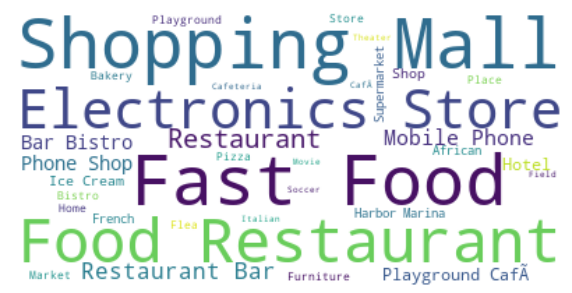

In [141]:
# display the word cloud
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

# display the wc

plt.imshow(cluster_wc, interpolation='bilinear')
plt.axis('off')
plt.show()


From the word cloud, it appears that the most venues are of the types **Shoping malls, Electronics Store  and Food restaurants.**

**Yopougan** as said from the begining,  is known for its Bars and lifestyle. And quite interesting it has similar nighborhoods in Dakar...

In [132]:
cluster_4.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Adjame (IC),Fast Food Restaurant,Flea Market,Mobile Phone Shop,Harbor / Marina,Bar
12,Dieuppeul Derkle (SN),Fast Food Restaurant,Electronics Store,Mobile Phone Shop,Harbor / Marina,Flea Market


This cluster shows that **_Fast Food Restaurant_** are highly present in these neighborhoods

Neighborhood        | City       
:------------------- |:-----------------
 Adjame                     |Abidjan 
------------------------|-----------------
Dieuppeul Derkle         |Dakar 



In [133]:
cluster_5.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
3,Bingerville (IC),Restaurant,Mobile Phone Shop,Harbor / Marina,Flea Market,Fast Food Restaurant


**_Bingerville_**  has no similar neighborhoods.

In [135]:
cluster_6.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Cocody (IC),Café,Supermarket,Fast Food Restaurant,Bakery,Boutique
10,Camberene (SN),Bakery,Mobile Phone Shop,Shopping Mall,Flea Market,Fast Food Restaurant
16,Grand Yoff (SN),Fast Food Restaurant,Supermarket,Ice Cream Shop,Bakery,Playground
25,Patte d Oie (SN),Supermarket,Ice Cream Shop,Park,African Restaurant,Pharmacy
26,Sicap Liberte (SN),Ice Cream Shop,Supermarket,Shopping Mall,Fast Food Restaurant,Bakery


>Cluster 6  includes has  (1) neighborhoods Abidjan and (4) form Dakar. These neighborhoods are therefore similar in their kinds : **Supermarket,Fast Food Restaurant,Ice Cream Shop**.

Neighborhood|City| Description
:-----------|:------------:|:-------------
Cocody |Abidjan|
-------------|---------------
Camberene|Dakar|
Grand Yoff |Dakar|
Patte d Oie|Dakar|
Sicap Liberte|Dakar|

<span></span>


***

In [137]:
cluster_7.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
19,Hann Bel Air (SN),Sporting Goods Shop,Furniture / Home Store,Diner,Mobile Phone Shop,Playground


**_Hann Bel Air_** has no similar neighborhoods in Ivory Coast.

### F- Results and Discussion 
During our analysis (based mainly on neighborhoods avenues categories) we were able to identify similarities between neighborhoods within the same cities and at a second stage similarities between neighborhoods of two different cities using Kmean model. 
+ We were able to identify for instance in Abidjan, neighborhoods which have high number of venues compared to Others. These neighborhoods are actually well equipped in infrastructures.
+ We noticed that restauration is one of the common category found in almost every neighborhood.
+ Some neighborhoods are mainly occupied by Europeans and beyond.

The venues analysis is not sufficient though, to show deeper insights on a neighborhood. Insights such as employment ratio, crime data can be exploit to improve the accuracy of the neighborhood description. But this is a starting point on revealing basic characteristics of a neighborhood.


### G- Conclusion <a name="conclusion"></a>

The Battle of the Neighborhoods project helped us to have some information on Abidjan and Dakar neighborhoods. And identified the similarity between them. 
Indeed, the results we obtained showed that a lot of Abidjan and Dakar neighborhoods are similar (7/10 from Abidjan and 10/18 from Dakar). Restauration is quite present at every corner. There are neighborhoods with plenty of known venues whereas some have almost none in the dataset of foursquare.

Yopougon appeared to be a mark or particularity of Abidjan with a lot of Bar, bistro, and so forth. But we found out with the clustering that it has some similarities with Dakar neighborhoods. 

Behavioral (or crime data) and the employment ratio data would help to provide much more insights on neighborhoods.